# Linear Regression with Boston Housing Dataset
- Minh Nguyen
- 11/17/2024 

Epoch 1, Loss 8997.7988
Epoch 101, Loss 2478.4392
Epoch 201, Loss 2162.5942
Epoch 301, Loss 1970.7051
Epoch 401, Loss 1843.9890
Epoch 501, Loss 1757.8867
Epoch 601, Loss 1703.7821
Epoch 701, Loss 1653.6677
Epoch 801, Loss 1616.9421
Epoch 901, Loss 1590.1741
Test Loss: 1476.0293


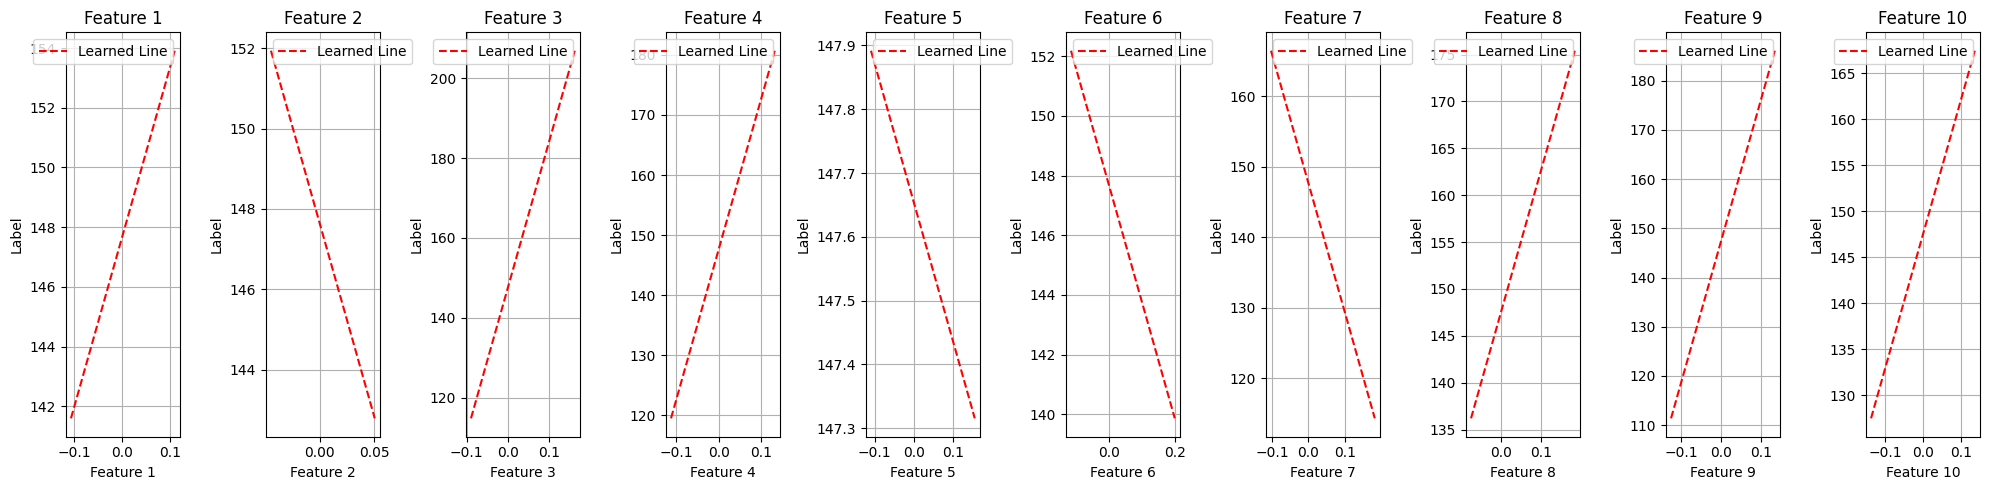

In [1]:
import torch
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Normalize features using StandardScaler
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DataLoader for training set
batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)

# Step 3: Define the Model
class LinearRegressionScratch:
    def __init__(self, num_inputs):
        self.w = torch.normal(0, 0.01, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)
    
    def forward(self, X):
        return torch.matmul(X, self.w) + self.b
    
# Step 4: Define the loss function
def squared_loss(y_hat, y):
    return ((y_hat - y) ** 2) / 2

# Step 5: Define the SGD Optimizer with parameters of model and learning rate
class SGD:
    def __init__(self, params, lr):
        self.params = params
        self.lr = lr
        
    def step(self):
        for param in self.params:
            param.data -= self.lr * param.grad.data
            
    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()
                
# Step 6: Training Function
def train(num_epochs, model, data_iter, loss_fn, optimizer):
    for epoch in range(num_epochs):
        for X, y in data_iter:
            # forward pass
            y_hat = model.forward(X)
            loss = loss_fn(y_hat, y).mean()
            
            # backward pass
            loss.backward()
            
            # Update param
            optimizer.step()
            optimizer.zero_grad()
        
        # print epoch training loss results
        with torch.no_grad():
            if epoch % 100 == 0:
                train_loss = loss_fn(model.forward(X_train), y_train).mean()
                print(f"Epoch {epoch+1}, Loss {train_loss.item():.4f}")
            
# Step 7: Init andd train model
lr = 0.03
num_epochs = 1000
num_features = X.shape[1]
model = LinearRegressionScratch(num_inputs=num_features)
optimizer = SGD([model.w, model.b], lr=lr)
train(num_epochs, model, train_loader, squared_loss, optimizer)

# Step 8: Evaluate Model on Test Set
with torch.no_grad():
    y_pred = model.forward(X_test)
    test_loss = squared_loss(y_pred, y_test).mean()
    print(f"Test Loss: {test_loss.item():.4f}")

# Step 9: Visualize Results
# Each wegiht corresponds to a features, we represent the contribution of a particular feature while fixing other dientsion
with torch.no_grad():
    fig, axs = plt.subplots(1, num_features, figsize=(20, 5))

    for i in range(num_features):
        ax = axs[i]
        x_line = torch.linspace(X_train[:, i].min(), X_train[:, i].max(), 100).reshape(-1, 1)
        
        # True vs Predicted line for the feature
        y_line_learned = model.w[i].item() * x_line + model.b.item()
        ax.plot(x_line.numpy(), y_line_learned.numpy(), label="Learned Line", linestyle='--', color='red')

        ax.set_title(f"Feature {i+1}")
        ax.set_xlabel(f"Feature {i+1}")
        ax.set_ylabel("Label")
        ax.legend()
        ax.grid()

    plt.tight_layout()
    plt.show()


In [2]:
# This means that when training, for each epoch, we iterate and update via each batch one by one and make iterative update
for X_batch, y_batch in train_loader:
    print(f"X_batch shape: {X_batch.shape}")  # Features
    print(f"y_batch shape: {y_batch.shape}")  # Labels
    break  # Exit after checking the first batch


X_batch shape: torch.Size([32, 10])
y_batch shape: torch.Size([32, 1])


In [3]:
num_batches = len(train_loader)
print(f"Number of batches: {num_batches}")

Number of batches: 12


In [4]:
# For testing, we can fetch the entire testing dataset at once
X_test.shape

torch.Size([89, 10])

In [6]:
X_train[0]

tensor([ 0.0708,  0.0507,  0.0121,  0.0563,  0.0342,  0.0494, -0.0397,  0.0343,
         0.0274, -0.0011])

In [7]:
y_train[0]

tensor([144.])

In [5]:
num_inputs = 10
torch.normal(0, 0.01, (num_inputs, 1), requires_grad=True)

tensor([[-0.0085],
        [ 0.0127],
        [-0.0135],
        [-0.0019],
        [-0.0037],
        [-0.0040],
        [ 0.0190],
        [ 0.0112],
        [ 0.0085],
        [-0.0123]], requires_grad=True)

Note: Each row of data has dimension of 10, thus for matmul to work, we need dimension of the weight to be 10 as well. 

But why not (10, 2) for weight? As this is the last layer of the model, we only want 1 output after matmul

Let's say we use 1 data sample to do Y = X*W + B
- Y has dim (1, ) = 1 sample dim 1
- X has dim (1,10) = 1 sample dim 10
- W has dim (10, 1)
- b has dim (1)

After matmul, we got Y = (1, )